# Machine Learning
    ### - Supervised Machine Learning  ( data + labels)
             - Regression    ( Regression, Lasso, Ridge)
                    - Simple Linear Regression
                    - Multiple Linear Regression
                    - Polynomial Regression
                    
             - Classification
                    - Binary Classification (0,1)(T/F)(CAT/DOG)
                    - Multiclassification   (Morethan 2 classes)
    ### - Unsupervised Machine Learning  ( data )
                    - Clustering 
                    - Dimensionality Reduction
                   
    ### - Semi_Supervised Machine Learning (data + labels(autoencoded) )
    ### - Reiforcement Learning

# Regression
    - Findind depending variable values using independent varuiable/es
    

# y=wx+b
- y is independent variable 
- w is slop
- b is interseapt
- is dependent variable

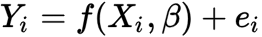

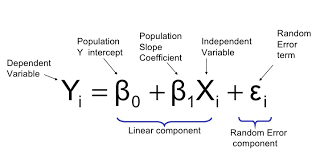

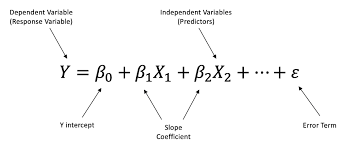

---**Hello everyone!**---

Today I am going to build my first machine learning alogrithm which a simple linear regression model.....


---**So what is linear regression?**---


--Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression. 


--It is the easiest alogrithm among all machine learning agorithm.


--Its quite simple to implement.


----**About Dataset**----

Here I am using a simple dataset from kaggle which is Weights and Heights dataset tried to apply linear regression algorithm.

The data contains the variables

**---Gender**

**---Height (m) **

**---Weight (kg)**



---**Goal**---

- Predict the height or weight of a person.


**Step 1--Data Preprocessing**

# Simple Linear Regression  ( Involves Only 1 input variable)

In [1]:

#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#Read the datasets
dataset=pd.read_csv("weight-height.csv")


In [3]:
#Check the dataset
dataset.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971111
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [4]:

#check if null values is present in dataset or not.....
dataset.isnull().sum()


Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
#Checking the dimensions of the dataset
dataset.shape

(10000, 3)

**Lets check the correlation between each variables**

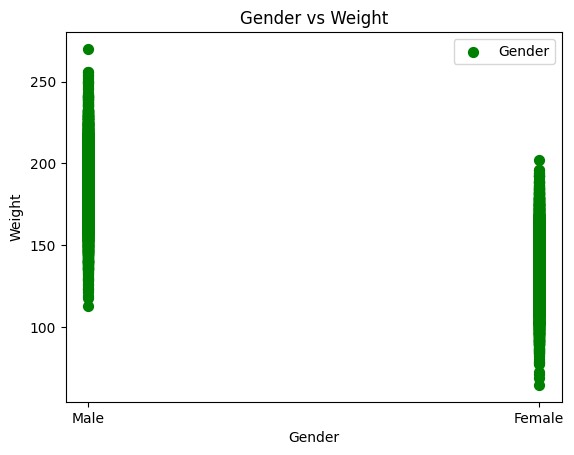

In [6]:
#Plot Gender vs Weight............
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, 2].values
plt.scatter(x1,y1,label='Gender',color='Green',s=50)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender vs Weight')
plt.legend()
plt.show()


In [7]:
dataset.Gender = dataset.Gender.apply(lambda x: 0 if x=="Female" else 1)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  int64  
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [9]:
dataset.Gender.corr(dataset.Weight)

0.7967233452062232

Here in the above plot, we can see **weight is not atall dependent on Gender**.
So,Gender variable **is not useful** for our prediction.

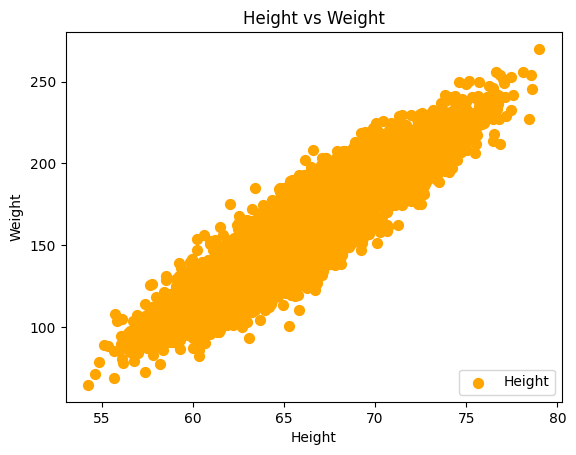

In [10]:
#Plot Height vs Weight............
x2 = dataset.iloc[:, 1].values
y2 = dataset.iloc[:, 2].values

plt.scatter(x2,y2,label='Height',color='Orange',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend(loc="lower right")
plt.show()

From the above plot can have idea that **weight and height are highly dependent** on each other.In other words,we can say that as **height increases ,weight also increases**.


In [11]:
#separating the dependent and independent values....
#X-Independent variable
X = dataset.iloc[:, 1:2].values
print(X)

[[73.84701702]
 [68.78190405]
 [74.11010539]
 ...
 [63.86799221]
 [69.03424313]
 [61.94424588]]


In [12]:
#y-dependent or target variable
y = dataset.iloc[:, 2].values
print(y)


[241.8935632 162.3104725 212.7408556 ... 128.4753188 163.8524613
 113.6491027]


**Step 2-Splitting the dataset into training and testing set**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1321)

In [14]:
import random
random.seed(122435)
random.randint(1,10)

7

**Step 3-Build a linear model**

In [15]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

### Training the model 

In [16]:
regressor.fit(X_train, y_train)

LinearRegression()

# Prediction on Training Data : Training Accuracy 

In [17]:
#predicting the trainig set
y_train_pred = regressor.predict(X_train)

In [18]:
pd.DataFrame({'Original Weight':y_train, 'Predicted_Weight': y_train_pred})

,Original Weight,Predicted_Weight
0,172.794261,171.947181
1,147.029164,136.865319
2,226.701023,223.526217
3,161.431658,153.409738
4,149.599596,152.788998
...,...,...
7995,178.918714,193.225172
7996,131.395557,145.067915
7997,122.924680,125.777442
7998,141.375098,132.066580


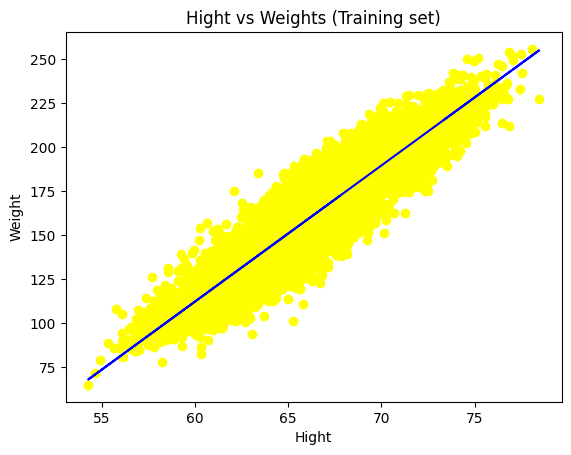

In [19]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'Yellow')
plt.plot(X_train, y_train_pred, color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

In [20]:
print('Coefficients: ', regressor.coef_)
print("Intercept", regressor.intercept_)

Coefficients:  [7.73190342]
Intercept -351.79070507483266


In [21]:
print('Variance score: %.2f' % regressor.score(X_train, y_train))

Variance score: 0.85


# Prediction on Testing Data : Testing Accuracy 

In [22]:
y_test_pred = regressor.predict(X_test)

In [23]:
pd.DataFrame({"Original Weight":y_test, "Predicted Weight":y_test_pred })

,Original Weight,Predicted Weight
0,183.936860,184.603609
1,129.001462,137.582434
2,170.191325,169.409373
3,193.217673,168.284992
4,166.390656,169.774674
...,...,...
1995,180.793711,151.553391
1996,192.092449,182.016215
1997,128.091026,136.653387
1998,214.060148,198.983018


**Step 5-Checking the accuracy**


In [24]:

# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))


Mean squared error: 147.94
Variance score: 0.86


In [25]:
def predictedWeight(height):
    return regressor.predict([[height]])

In [37]:
height = float(input("if you wana guess youe wait please provide me your height in feet"))*12
print(f"Our model says your weight is about {(predictedWeight(height)*0.453592)} Kgs")

if you wana guess youe wait please provide me your height in feet5.75
Our model says your weight is about [82.42248863] Kgs
